# Klasterisasi K-Means

Klasterisasi merupakan salah satu klasifikasi tak terpandu (unsupervised classification). Ciri khas klasifikasi tak terpandu adalah pada data latih tidak tersedia target atau label yang berisi informasi kelas tiap-tiap tuple.

Tahapan dalam klasterisasi dengan K-Means antara lain:
1. Menentukan jumlah klaster "K" yang akan dibagi.
2. Menentukan data k sebagai titik pusat (centroid) awal tiap klaster. 
3. Mengelompokan data ke dalam K cluster sesuai dengan titik pusat yang telah ditentukan sebelumnya.
4. Memperbaharui pusat klaster dan mengulangi langkah ketiga sampai nilai dari titik centroid tidak berubah.

Penentuan suatu tuple masuk klaster mana adalah dengan menggunakan jarak. Biasanya menggunakan Euclidean dan Manhattan.

## Menyiapkan Dataset

In [1]:
# import Pustaka
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
# Mengambil data dari file csv
datasiswa = pd.read_csv('kmeansbeasiswa.csv')
df = pd.DataFrame(datasiswa,columns=['Mahasiswa','IPK','Tingkat Kemiskinan (TM)'])
X = np.asanyarray(datasiswa)
X_train = X[:,1:]
X_train

array([[0.8, 0.8],
       [1.2, 1. ],
       [1. , 1.2],
       [2. , 1.5],
       [0.7, 1.5],
       [2.5, 3. ],
       [3. , 2.5],
       [3. , 2. ],
       [3. , 3. ],
       [3.5, 3.9],
       [2.5, 3.5]])

## Memanggil K-Means

In [4]:
# Proses klasterisasi dengan K-Means
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

c:\Users\ASUS\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

Proses "fitting" di atas menghasilkan pusat center (centroid) dan label/target utk tiap-tiap tuple data beasiswa.

In [5]:
pusat = kmeans.cluster_centers_
label = kmeans.labels_
print(pusat)
print(label)

[[1.14       1.2       ]
 [2.91666667 2.98333333]]
[0 0 0 0 0 1 1 1 1 1 1]


Berikut adalah visualisasi hasil dgn menggunakan grafik/plot.

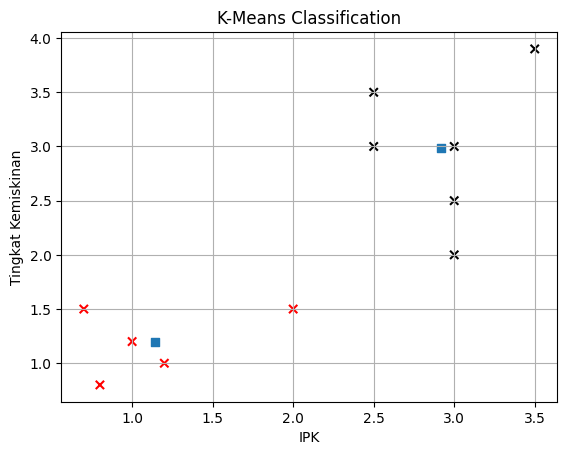

In [6]:
# Visualisasi Data
absis = [X_train[:,0]]
ordinat = [X_train[:,1]]
target = label+absis-absis
plt.scatter(absis,ordinat, c=target, cmap='flag', marker='x')

# Label
plt.xlabel("IPK")
plt.ylabel("Tingkat Kemiskinan")
plt.title("K-Means Classification")
plt.scatter(pusat[:,0],pusat[:,1], marker='s')
plt.grid()

Di sini ada dua warna yang mewakili klaster (beasiswa atau tidak). Titik dengan "marker" kotak menggambarkan centroid tiap klaster. Jika ada data baru, tinggal diukur mana jarak yang terdekat terhadap dua titik pusat tersebut untuk memutuskan klaster data tersebut.